# Analyzing US Electrical Outages (2006 - 2021 YTD)

The major Texas freeze event in Feb 2021 highlighted the fragility of our electrical infrastructure and the impact an electrical outage can have on a community.  As global temperatures increase and already strained infrastructure continues to age, the frequency of electrical outages will likely increase.

The purpose of this project is to understand the current nature and frequency of electricity outages across the United States - what types of outages are most common, where most outages are occuring, and if outages are increasing. The data will be used to forecast future outages.

The data for this project was provided by the Department of Energy and can be found [here](https://www.oe.netl.doe.gov//OE417_annual_summary.aspx).

## Importing Data Sets

Annual data are stored on the DOE website in one file per year.  The files must be cleaned and standardized before concatenating.

In [331]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches

In [332]:
# import and inspect first spreadsheet
f2021 = pd.read_csv('2021_Annual_Summary.csv', header = 1)

In [333]:
# convert dates and times to strftime

def formatting(dataframe):
    day_format = '%m/%d/%Y'
    alt_day_format = '%m/%d/%y'
    time_format = '%I:%M %p'
    dataframe['Date Event Began'] = pd.to_datetime(dataframe['Date Event Began'], infer_datetime_format=True, errors='coerce')    
    dataframe['Date of Restoration'] = pd.to_datetime(dataframe['Date of Restoration'], infer_datetime_format=True, errors='coerce')    

formatting(f2021)
f2021.tail(20)

,Month,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Area Affected,NERC Region,Alert Criteria,Event Type,Demand Loss (MW),Number of Customers Affected
101,February,2021-02-16,5:35 PM,2021-02-17,12:00 AM,Louisiana: Lafayette Parish;,SERC,Public appeal to reduce the use of electricity...,Severe Weather,Unknown,Unknown
102,February,2021-02-16,6:24 AM,2021-02-16,10:41 AM,Louisiana:,SERC,Firm load shedding of 100 Megawatts or more im...,System Operations,100,18150
103,February,2021-02-16,1:00 AM,2021-02-16,9:28 PM,Kentucky:,SERC,"Loss of electric service to more than 50,000 c...",Severe Weather,Unknown,54167
104,February,2021-02-16,6:10 AM,NaT,Unknown,Missouri:,SERC,Firm load shedding of 100 Megawatts or more im...,Severe Weather/Transmission Interruption,130,Unknown
105,February,2021-02-16,7:00 AM,NaT,Unknown,New Jersey: Pennsylvania: Texas: California: I...,RF,Cyber event that could potentially impact elec...,Cyber Event,Unknown,0
106,February,2021-02-16,7:22 AM,2021-02-16,8:00 AM,"Louisiana: Allen Parish, St. Landry Parish, Ev...",SERC,Firm load shedding of 100 Megawatts or more im...,Severe Weather,153,Unknown
107,February,2021-02-16,6:48 AM,NaT,Unknown,Louisiana: Texas:,SERC,Firm load shedding of 100 Megawatts or more im...,Severe Weather,402,Unknown
108,February,2021-02-16,4:26 AM,NaT,Unknown,Texas:,TRE,Firm load shedding of 100 Megawatts or more im...,Severe Weather,300,Unknown
109,February,2021-02-17,6:00 PM,2021-02-17,11:00 PM,Louisiana:,SERC,Public appeal to reduce the use of electricity...,System Operations,Unknown,Unknown
110,February,2021-02-17,6:00 PM,2021-02-17,11:00 PM,Texas:,TRE,Public appeal to reduce the use of electricity...,Severe Weather,Unknown,Unknown


In [334]:
# importing and concatenating 2011 through 2021 spreadsheets.

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
events = pd.DataFrame()

for file in years:
    # read in file
    df = pd.read_csv('{}_Annual_Summary.csv'.format(file), header = 1)
    # check for unnamed columns and remove
    if "Unnamed: 18" in df.columns:
        columns = df.columns.drop(['Unnamed: 9','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12','Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18'])
        df = df[columns].dropna(thresh=4)
        df = df.dropna(thresh=4)
    elif "Unnamed: 9" in df.columns:
        columns = df.columns.drop(['Unnamed: 11', 'Unnamed: 10', 'Unnamed: 9'])
        df = df[columns].dropna(thresh=4)
    elif "Unnamed: 11" in df.columns:
        columns = df.columns.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])
        df = df[columns].dropna(how='all')
    # concatenate files
    events = pd.concat([events, df], axis = 0, ignore_index = True).dropna(thresh=4)
    # time formatting
    formatting(events)
# drop bad rows
events = events.drop([334, 363, 389, 416, 443, 469, 495])
events.head(30)

,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Month,Alert Criteria
0,2011-01-11,11:08 PM,2011-01-11,11:08 PM,"Athens, New York",NPCC,Electrical Fault at Generator,0,0,NaN,NaN
1,2011-01-12,6:00 AM,2011-01-12,2:00 PM,Massachusetts,NPCC,Winter Storm,NaN,"80,000",NaN,NaN
2,2011-01-13,7:21 AM,2011-01-13,8:13 AM,North Florida,FRCC,Firm System Load Shed,150,"20,900",NaN,NaN
3,2011-01-18,2:00 PM,2011-01-18,2:00 PM,"Whitman, Auburn St Substation, Massachusetts",NPCC,Vandalism,0,0,NaN,NaN
4,2011-01-23,7:00 AM,2011-01-23,1:00 PM,"Franklin County, Idaho",WECC,Vandalism,0,0,NaN,NaN
5,2011-01-24,1:20 PM,2011-01-24,1:30 PM,"Newman Power Plant, Texas",WECC,Suspicious Activity,0,0,NaN,NaN
6,2011-01-25,3:23 AM,2011-01-25,11:00 AM,"Newark, Delaware",RFC,Vandalism,0,0,NaN,NaN
7,2011-01-26,9:25 AM,2011-01-27,5:00 PM,"Carson City, Nevada",WECC,Suspected Telecommunications Attack,0,0,NaN,NaN
8,2011-01-26,9:33 AM,2011-01-27,3:03 PM,Michigan,RFC,Vandalism,0,0,NaN,NaN
9,2011-01-26,5:00 PM,2011-01-31,8:00 AM,"Montgomery and Prince George's County, Marylan...",RFC,Winter Storm,NaN,"210,000",NaN,NaN


In [335]:
years_2 = [2006,2009, 2010]
events_2 = pd.DataFrame()
for file in years_2:
    df = pd.read_csv('{}_Annual_Summary.csv'.format(file), header = 1, sep = ',', lineterminator = '\r', error_bad_lines = False)
    df = df[['Date', 'Time', 'Restoration', 'Area Affected', 'NERC Region', 'Type of Disturbance', 'Loss (megawatts)', 'Number of Customers Affected 1']]
    df = df.dropna(thresh=4).rename(columns={'Date': 'Date Event Began', 'Time': 'Time Event Began', 'Restoration': 'Date of Restoration', 'Type of Disturbance': 'Event Type', 'Loss (megawatts)': 'Demand Loss (MW)','Number of Customers Affected 1': 'Number of Customers Affected'})
    formatting(df)
    df['Date of Restoration'] = df['Date of Restoration'] + pd.to_timedelta(-365*(2021 - file) - 4, unit='D')
    events_2 = pd.concat([events_2, df], axis = 0, ignore_index = True).dropna(thresh = 4)


events_2 = events_2.drop([26, 49, 77, 128, 160, 226, 263, 299])
events_2.tail()

b'Skipping line 114: expected 8 fields, saw 10\n'
b'Skipping line 126: expected 8 fields, saw 10\n'
b'Skipping line 146: expected 8 fields, saw 10\n'


,Date Event Began,Time Event Began,Date of Restoration,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected
314,2010-12-14,7:20 a.m.,2010-12-13 07:25:00,California,WECC,Electrical System Separation - Islanding,9,"6,635"
315,2010-12-14,7:36 a.m.,2010-12-14 09:00:00,Southern California,WECC,Transmission Equipment/Firm System Load,464,NaN
316,2010-12-18,5:00 a.m.,2010-12-18 22:00:00,"Redmond, Washington",WECC,Severe Weather,184,"92,090"
317,2010-12-26,8:15 a.m.,2010-12-25 16:15:00,Carolina,SERC,Severe Weather,NaN,"42,000"
318,2010-12-30,2:00 p.m.,2010-01-11 06:00:00,New York,RFC,Fuel Supply Deficiency,300,NaN


In [336]:
# 2008 file had enough differences to clean and import separately.
#date = datetime.strptime('26 Sep 2012', '%d %b %Y')
#newdate = date.replace(hour=11, minute=59)
f2008 = pd.read_csv('2008_Annual_Summary.csv', header = 2,sep=',',lineterminator='\r',error_bad_lines=False)
f2008_columns = f2008.columns.drop(['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 8'])
f2008 = f2008[f2008_columns].dropna(thresh=4)
f2008 = f2008[['Date', 'Time', 'Restoration', 'Area Affected', 'NERC Region', 'Type of Disturbance', 'Loss (megawatts)', 'Number of Customers Affected 1']]
f2008 = f2008.dropna(thresh=4).rename(columns={'Date': 'Date Event Began', 'Time': 'Time Event Began', 'Restoration': 'Date of Restoration', 'Type of Disturbance': 'Event Type', 'Loss (megawatts)': 'Demand Loss (MW)','Number of Customers Affected 1': 'Number of Customers Affected'})
formatting(f2008)
f2008['Date of Restoration'] = f2008['Date of Restoration'] + pd.to_timedelta(-365*13 - 4, unit='D')
f2008 = f2008.drop([33, 71, 103, 136, 178])
f2008.head()

b'Skipping line 193: expected 12 fields, saw 14\n'


,Date Event Began,Time Event Began,Date of Restoration,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected
2,2008-01-04,4:00 a.m.,2008-01-14 17:00:00,Northern California,WECC,Winter Storm,500,"2,606,931"
3,2008-01-04,7:47 a.m.,2008-01-04 16:30:00,Sacramento County,WECC,Severe Storm,300,"150,000"
4,2008-01-29,5:00 a.m.,2008-01-29 12:17:00,"San Francisco Bay Area, California",WECC,Exciter Faulted,NaN,-
5,2008-01-29,4:00 p.m.,2008-02-03 08:00:00,"Arkansas, Mississippi, North Louisiana",SERC,Severe Thunderstorms,NaN,"110,000"
6,2008-01-29,10:00 p.m.,2008-02-01 18:30:00,Southeastern Michigan,RFC,Wind/Ice Storm,NaN,"86,915"


In [337]:
# 2007 file had enough differences to clean and import separately.

f2007 = pd.read_csv('2007_Annual_Summary.csv', header = 1,sep=',',lineterminator='\r',error_bad_lines=False)
f2007 = f2007[['Date', 'Time', 'Restoration', 'Area Affected', ' NERC Region', 'Type of Disturbance', 'Loss (megawatts)', 'Number of Customers Affected 1[1]']]
f2007 = f2007.dropna(thresh=4).rename(columns={'Date': 'Date Event Began', 'Time': 'Time Event Began', 'Restoration': 'Date of Restoration', 'Type of Disturbance': 'Event Type', 'Loss (megawatts)': 'Demand Loss (MW)',' NERC Region': 'NERC Region','Number of Customers Affected 1[1]': 'Number of Customers Affected'})
formatting(f2007)
f2007 = f2007.drop([37, 71])
f2007['Date of Restoration'] = f2007['Date of Restoration'] + pd.to_timedelta(-365*14 - 4, unit='D')
f2007.head()

b'Skipping line 99: expected 8 fields, saw 10\n'


,Date Event Began,Time Event Began,Date of Restoration,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected
1,2007-01-05,10:44 a.m.,2007-01-05 11:13:00,Island of Puerto Rico,PR,Voltage Reduction,0,0
2,2007-01-13,5:00 a.m.,2007-01-19 12:00:00,Missouri and Illinois,MRO,Ice Storm,NaN,"225,000"
3,2007-01-13,7:30 a.m.,2007-01-19 16:00:00,Eastern and Lower Michigan,RFC,Ice Storm,500,"129,607"
4,2007-01-16,2:00 a.m.,2007-01-17 00:00:00,"Snohomish County, Washington",WECC,Major Windstorm,260,"110,433"
6,2007-02-13,2:00 p.m.,2007-02-16 00:00:00,Indiana and Southwest Ohio,RFC,Ice/Wind Storm,250,"367,500"


In [338]:
# concatenate all spreadsheets
events = pd.concat([f2007, f2008, events_2, events], axis = 0).sort_values(by='Date Event Began')
events.head(10)

,Date Event Began,Time Event Began,Date of Restoration,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Time of Restoration,Month,Alert Criteria
0,2006-01-14,3:45 p.m.,2006-01-16 17:30:00,"Chester, Montgomery, Delaware, Philadelphia an...",RFC,High Winds,--,"142,315",NaN,NaN,NaN
1,2006-01-18,3:16 p.m.,2006-01-18 18:34:00,Southern and Central Maine,NPCC,Severe Storm,75,"63,000",NaN,NaN,NaN
3,2006-02-04,4:30 a.m.,2006-02-08 08:00:00,Western Washington,WECC,Severe Windstorm,--,"140,000",NaN,NaN,NaN
2,2006-02-04,1:34 a.m.,2006-02-06 00:01:00,"Snohomish County, Washington",WECC,Strong Winds,150,"123,827",NaN,NaN,NaN
4,2006-02-11,9:00 p.m.,2006-02-14 23:00:00,Baltimore Metropolitan and Central Maryland,RFC,Major Snow Storm,500,"180,000",NaN,NaN,NaN
5,2006-02-12,12:06 a.m.,2006-02-14 17:44:00,"Washington DC, Montgomery and Prince Georges C...",RFC,Major Snow Storm,300,"60,000",NaN,NaN,NaN
6,2006-02-12,2:00 a.m.,2006-02-14 16:00:00,Entire Atlantic City Electric territory Southe...,RFC,Winter Snow/Ice Storm,80,"130,000",NaN,NaN,NaN
7,2006-02-12,2:00 a.m.,2006-02-13 07:00:00,Entire Delmarva Power service territory,RFC,Winter Snow/Ice Storm,50,"58,000",NaN,NaN,NaN
8,2006-02-12,5:55 a.m.,2006-02-12 14:00:00,Northern and Northwestern Virginia,RFC,Severe Snow Storm,250,"126,000",NaN,NaN,NaN
10,2006-02-16,Ongoing,NaT,North Dakota,MRO,Fuel Supply - Deficiency Coal Rail Transportat...,"1,650",0,NaN,NaN,NaN


## Data Cleaning

There are six NERC electrical regions (shown below) that will be used to organize the data.

![texte](https://www.nerc.com/AboutNERC/keyplayers/PublishingImages/Region%20Map.jpg)

In [339]:
## reassign regions into the six main regional entities
region_map = {'WECC':'WECC',
              'SERC':'SERC',
              'RFC': 'RFC',
              'NPCC': 'NPCC',
              'TRE':'TRE',
              'MRO': 'MRO',
              'RF':'RFC',
              'SPP':'MRO',
              'SPP RE':'MRO',
              'FRCC':'SERC',
              'ERCOT':'TRE',
              'NP':'NPCC',
              'TE':'TRE',
              'NaN':'Unknown'}

events['NERC Region'] = events['NERC Region'].map(region_map)
events.shape

(2865, 11)

In [340]:
## add a new column for outage length
events['Outage Length'] = events['Date of Restoration'] - events['Date Event Began']
events.head()

,Date Event Began,Time Event Began,Date of Restoration,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Time of Restoration,Month,Alert Criteria,Outage Length
0,2006-01-14,3:45 p.m.,2006-01-16 17:30:00,"Chester, Montgomery, Delaware, Philadelphia an...",RFC,High Winds,--,"142,315",NaN,NaN,NaN,2 days 17:30:00
1,2006-01-18,3:16 p.m.,2006-01-18 18:34:00,Southern and Central Maine,NPCC,Severe Storm,75,"63,000",NaN,NaN,NaN,0 days 18:34:00
3,2006-02-04,4:30 a.m.,2006-02-08 08:00:00,Western Washington,WECC,Severe Windstorm,--,"140,000",NaN,NaN,NaN,4 days 08:00:00
2,2006-02-04,1:34 a.m.,2006-02-06 00:01:00,"Snohomish County, Washington",WECC,Strong Winds,150,"123,827",NaN,NaN,NaN,2 days 00:01:00
4,2006-02-11,9:00 p.m.,2006-02-14 23:00:00,Baltimore Metropolitan and Central Maryland,RFC,Major Snow Storm,500,"180,000",NaN,NaN,NaN,3 days 23:00:00


In [341]:
# add 'Year' and 'Month' columns
events['Year'] = events['Date Event Began'].dt.year
events['Month'] = events['Date Event Began'].dt.month

In [342]:
# Drop columns that will not be used in the analysis.
events = events.drop(labels = ['Time Event Began', 'Time of Restoration', 'Alert Criteria', 'Time Event Began'], axis = 1)

### Combining outage types into categories

Each DOE file uses different terminology and criteria to describe the root cause of each electrical outage.  A level of subjectivity is introduced as a result.  In order to reduce the impact of different terms and to make the data easier to analyze, the types of outages will be grouped into three main categories (weather-related, transmission interruptions, and physical attacks).

Weather-related outages will emcompass everything from storms to hurricanes to fires.

Transmission interruptions will emcompass equipment-level issues across all levels of the supply chain (generation, transmission, end user supply and demand).

Physical attacks will include cyber events and intentional grid sabotage.

In [343]:
events['Event Type'].unique()

array(['High Winds', 'Severe Storm', 'Severe Windstorm', 'Strong Winds',
       'Major Snow Storm', 'Winter Snow/Ice Storm', 'Severe Snow Storm',
       'Fuel Supply - Deficiency Coal Rail Transportation Interruption',
       'Severe Thunderstorm/ Snow/Ice Storm', 'Severe Weather',
       'Inadequate Electric Resources to Serve Load',
       'Severe Winter Storm', 'Major Storms/Tornadoes',
       'Voltage Reduction/Load Shed', 'Severe Weather/ Tornadoes',
       'Load Shed/Declared EECP',
       'Load Shed/Made Public Appeals/Rolling Blackouts',
       'Load Shed/ Declared EECP', 'Lightning Storm',
       'Transmission Equipment Failure/Fire', 'Load Shed',
       'Lightning Strike', 'Severe Thunderstorms', 'Severe Thunderstorm',
       'Severe Lightning Storms',
       'Severe Weather/Public Appeals Made/Voltage Reduction',
       'Lightning Storms/Tripped Lines',
       'Severe Storms (3) (Many customers experienced multiple outages.)',
       'Load Reduction/Public Appeals Made',
   

In [344]:
# categorizing physical attacks:
# Keywords 'attack', 'physical', 'vandal', 'sabotage', 'cyber', and 'suspic'
# categorizing Winter Storms:
# ice, snow, winter, cold, easter
events['type'] = events['Event Type'].str.replace(r'.*[Aa]ttack.*', 'Physical Attack').str.replace(r'.*Cyber.*', 'Physical Attack').str.replace(r'.*Physical.*', 'Physical Attack').str.replace(r'.*Vandal.*', 'Physical Attack').str.replace(r'.*Sabotage.*','Physical Attack').str.replace(r'.*Suspic.*','Physical Attack').str.replace(r'.*[Ii]ce.*', 'Winter Storm').str.replace(r'.*[Ss]now.*', 'Winter Storm').str.replace(r'.*Winter.*','Winter Storm').str.replace(r'.*easter.*','Winter Storm').str.replace(r'.*Hail.*','Winter Storm').str.replace(r'.*[Cc]old.*','Winter Storm')

In [345]:
# categorizing Fuel Supply Issues and Transmission Interruptions:
# fuel supply, islanding, system, transmission, distribution, shed, load
events['type_a'] = events.type.str.replace(r'.*Fuel Supply.*', 'Fuel Supply').str.replace(r'.*Islanding.*', 'Transmission Interruption').str.replace(r'.*System.*', 'Transmission Interruption').str.replace(r'.*Distribution.*', 'Transmission Interruption').str.replace(r'.*Transmission.*', 'Transmission Interruption').str.replace(r'.*[Ss]hed.*', 'Transmission Interruption').str.replace(r'.*Load.*', 'Transmission Interruption').str.replace(r'.*Transformer.*', 'Transmission Interruption')

# categorizing Equipment Malfunctions:
# load shed, deficiency, electrical fault, failure
events.type = events.type_a.str.replace(r'.*Load Shed.*', 'Equipment Malfunction').str.replace(r'.*Deficiency.*', 'Equipment Malfunction').str.replace(r'.*Electrical Fault.*', 'Equipment Malfunction').str.replace(r'.*Failure.*','Equipment Malfunction')

In [346]:
# categorizing Storms:
# wind, thunder, lightning, major, Severe Storm
events['type_a'] = events.type.str.replace(r'.*[Ww]ind.*', 'Storm').str.replace(r'.*Thunder.*', 'Storm').str.replace(r'.*Severe Storm.*', 'Storm').str.replace(r'.*Lightning.*', 'Storm').str.replace(r'.*Major.*', 'Storm')

In [347]:
# Public Appeals (appeal, inadequacy)
events['type'] = events.type_a.str.replace(r'.*Appeal.*', 'Public Appeal').str.replace(r'.*Inadequacy.*', 'Public Appeal').str.replace(r'.*dequate.*', 'Public Appeal')

# Natural Disasters (disaster, hurricane, isaac, tropical)
events['type_a'] = events.type.str.replace(r'.*Disaster.*', 'Natural Disasters').str.replace(r'.*Tropical.*', 'Natural Disasters').str.replace(r'.*Hurricane.*', 'Natural Disasters').str.replace(r'.*Isaac.*', 'Natural Disasters')

# Voltage Reductions and Trips as Equip Malfunctions (trip, voltage, megawatt, loss, faulted)
events['type'] = events.type_a.str.replace(r'.*Trip.*', 'Equipment Malfunction').str.replace(r'.*[Vv]oltage.*', 'Equipment Malfunction').str.replace(r'.*Megawatts.*', 'Equipment Malfunction').str.replace(r'.*Loss.*', 'Equipment Malfunction').str.replace(r'.*Unit Shut Down.*', 'Equipment Malfunction').str.replace(r'.*[Ff]aulted.*', 'Equipment Malfunction')

# Weather Other (weather, other, helicopter, Earthquake, Tornadoes, Fire, Natural Disasters)
events['type_a'] = events.type.str.replace(r'.*Weather.*', 'Weather Other').str.replace(r'.*Storm.*', 'Weather Other').str.replace(r'.*Natural.*', 'Weather Other').str.replace(r'.*Earthquake.*', 'Weather Other').str.replace(r'.*Tornadoes.*', 'Weather Other').str.replace(r'.*Fire.*', 'Weather Other').str.replace(r'.*Other.*', 'Weather Other').str.replace(r'.*Heat.*', 'Weather Other').str.replace(r'.*Helicopter.*', 'Weather Other').str.replace(r'.*Type.*', 'Weather Other')

# Combining equipment-type issues as Transmission Interruptions
events['type'] = events['type_a']
events['type'].unique()

array(['Weather Other', 'Fuel Supply', 'Transmission Interruption',
       'Public Appeal', 'Equipment Malfunction', 'Physical Attack'],
      dtype=object)

All types have been classified as:
* Transmission Interruptions
* Physical Attacks
* Weather related
* Fuel Supply
* Public Appeal

## Exploratory Data Analysis

### Total Electrical Outages Trend

Text(0, 0.5, 'Number of Outages')

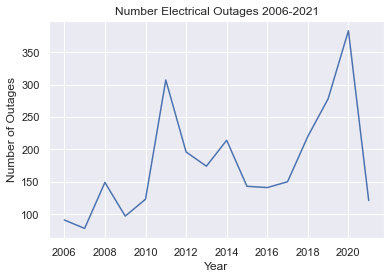

In [348]:
events.groupby('Year')['Date Event Began'].count().plot()
plt.title('Number Electrical Outages 2006-2021')
plt.ylabel('Number of Outages')

Electrical outages have increased since 2006.  2011 appears to be an outlier requiring additional investigation.  Only a partial year of data is available for 2021, which is why the total appears to be lower than the other years.

### Investigating 2011

Text(0, 0.5, 'Number of Outages')

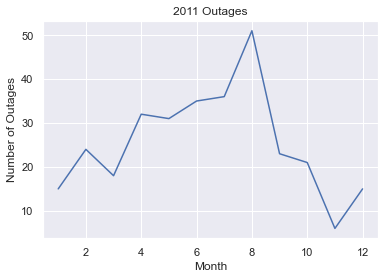

In [349]:
events[events['Year'] == 2011].groupby('Month')['Month'].count().plot()
plt.title('2011 Outages')
plt.ylabel('Number of Outages')

Summer 2011 appears to have an abnormally high number of outages.  Additional research showed that hurricanes, storms, and record high temps contributed to a higher than normal number of electrical issues.

### Types of Electrical Outages

Text(0, 0.5, 'Number of Outages')

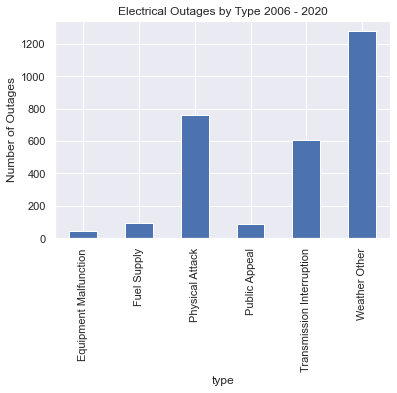

In [350]:
events.groupby('type')['type'].count().plot(kind='bar')
plt.title('Electrical Outages by Type 2006 - 2020')
plt.ylabel('Number of Outages')

Most outages tend to be weather-related.  Type of weather is known for some of the rows, but a large number of events were categorized as 'severe weather.'  Since the weather descriptors are not uniformally specific, all were grouped under 'Weather Other.'

### Outage Length

In [355]:
events['Outage Days'] = events['Outage Length'].dt.days
events[events['Outage Days'] < 0]
#events.groupby('type')['Outage Days'].mean().plot(kind='bar')

,Date Event Began,Date of Restoration,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Month,Outage Length,Year,type,type_a,Outage Days
93,2006-12-30,2006-01-06 14:25:00,"Gosper, Harlan, Franklin, Webster, Clay, Adams...",MRO,Severe Weather,300-500,"15,000",12,-358 days +14:25:00,2006,Weather Other,Weather Other,-358.0
36,2008-03-04,2008-03-03 22:45:00,North and South Carolina,SERC,Thunderstorms,300,"55,267",3,-1 days +22:45:00,2008,Weather Other,Weather Other,-1.0
37,2008-03-08,2008-03-07 21:59:00,Virginia and Eastern Part of North Carolina,SERC,Windstorm,210,"141,130",3,-1 days +21:59:00,2008,Weather Other,Weather Other,-1.0
41,2008-04-04,2008-04-03 17:00:00,"Arkansas, North Louisiana, Mississippi",SERC,Severe Thunderstorms,NaN,"122,600",4,-1 days +17:00:00,2008,Weather Other,Weather Other,-1.0
44,2008-05-08,2008-05-07 00:56:00,California,WECC,Load Shedding,483,0,5,-1 days +00:56:00,2008,Transmission Interruption,Transmission Interruption,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2010-12-26,2010-12-25 16:15:00,Carolina,NaN,Severe Weather,NaN,"42,000",12,-1 days +16:15:00,2010,Weather Other,Weather Other,-1.0
318,2010-12-30,2010-01-11 06:00:00,New York,NaN,Fuel Supply Deficiency,300,NaN,12,-353 days +06:00:00,2010,Fuel Supply,Fuel Supply,-353.0
41,2011-03-08,2001-03-18 00:00:00,Western New York,NPCC,Fuel Supply Deficiency (Coal),676,UNK,3,-3642 days +00:00:00,2011,Fuel Supply,Fuel Supply,-3642.0
219,2011-08-27,1977-08-29 00:00:00,District of Columbia; Maryland,RFC,Severe Weather,NaN,"220,000",8,-12416 days +00:00:00,2011,Weather Other,Weather Other,-12416.0


### Weather and Transmission-related Outages

In [ ]:
## Seasonality of Electrical Outages
events[(events['type'] != 'Physical Attack') & (events['type'] != 'Cyber Event') & (events['Year'] < 2021)].groupby('Month').Month.count().plot()
plt.title('Non-Physical Attack Outages by Month')
plt.ylabel('Number of Outages')

Weather-related and transmission outages are more common in the summer months.

Hurricanes tend to be hit between August and October.  Equipment maintenance outages also tend to occur in the summertime.

In [ ]:
pre_2021 = events[events['Year'] < 2021]
pre_2021[(pre_2021['type'] == 'Equipment Malfunction') | (pre_2021['type'] == 'Transmission Interruption')].groupby('Month').Month.count().plot()
pre_2021[pre_2021['type'] == 'Weather Other'].groupby('Month').Month.count().plot()
plt.title('Infrastructure (Blue) and Severe Weather (Orange) Outages by Month')
plt.ylabel('Number of Outages')

Most outages tend to be in the summer months. This is when we see the largest number of grid infrastructure/supply issues. August tends to have the most severe weather.

(2021 was excluded from the analysis since only a partial year of data is available.)

### Regional Analysis

In [ ]:
events.groupby('NERC Region')['Date Event Began'].count().plot(kind='bar')
plt.title('Electrical Outages By Region')
plt.ylabel('Number of Outages')

In [ ]:
wecc_events = events[events['NERC Region'] == 'WECC']
wecc_events.groupby('Year')['Year'].count().plot()
plt.title('West Coast Outages Annual Count')
plt.ylabel('Number of Outages')

In [ ]:
wecc_events.groupby('type')['type'].count().plot(kind='bar')
plt.title('West Coast Electrical Outages by Type 2006 - 2020')

In [ ]:
wecc_events[wecc_events['type'] == 'Transmission Interruption'].groupby('Year')['Year'].count().plot()
plt.title('Transmission Interruptions in West Coast States 2011-2021')
plt.ylabel('Number of Outages')

In [ ]:
# not as interested in public appeal and fuel supply issues, so will drop them from the data set.
# Equipment Malfunction as a category was no longer used after 2014, so will drop it as well.

events = events[(events['type'] == 'Weather Other') | (events['type'] == 'Physical Attack') | (events['type'] == 'Transmission Interruption')]
events.type_a = events.type.map({'Weather Other': 1, 'Physical Attack': 2, 'Transmission Interruption': 3})
events.type_a.value_counts()

In [ ]:
events[['NERC Region', 'type_a']].groupby('NERC Region')['type_a'].value_counts().plot(kind='bar')
plt.title('Number of Outages by Type and Region')
plt.ylabel('Number of Outages')

### Summary Charts

Exploratory analysis paints a picture of increasing electrical outages in across all major types of events, with most events occuring in the American west.  The second-half of the project will summarize these data and conduct a time-series analysis on total electrical outages and then specifically the West Coast. 

In [ ]:
## setting up graph formatting
sns.set(style='darkgrid')
plt.figure(figsize=(20, 30))

In [ ]:
total_events = events.groupby('Year')['Year'].count()
# top bars (weather events)
sns.histplot(x = 'Year', data = events, hue = 'type_a', multiple = 'stack', element = 'poly', palette = 'crest')
plt.legend(labels = ['Weather Related', 'Physical Attack', 'Transmission Error'], loc = 2)
plt.title('Annual US Electricity Outages, 2006 - 2020', fontsize = 17)
plt.ylabel('Number of Events')
plt.show()

### Types of Outages Across Each Region

In [ ]:
weather_related = events[(events['type_a'] == 1)]
g = sns.FacetGrid(weather_related, col='NERC Region', col_wrap = 3)
g.map(sns.histplot, 'Year', element = 'poly').set_axis_labels('Year', 'Weather Events')
plt.show()

In [ ]:
trans_related = events[events['type_a'] == 3]
g = sns.FacetGrid(trans_related, col='NERC Region', col_wrap = 3)
g.map(sns.histplot, 'Year', element = 'poly').set_axis_labels('Year', 'Transmission Events')
plt.show()

In [ ]:
wecc_events = events[events['NERC Region'] == 'WECC']
# top bars (weather events)
sns.histplot(x = 'Year', data = wecc_events, hue = 'type_a', multiple = 'stack', element = 'poly', palette = 'crest')
plt.legend(labels = ['Weather Related', 'Physical Attack', 'Transmission Error'], loc = 2)
plt.title('Annual West Coast Electricity Outages, 2006 - 2020', fontsize = 17)
plt.show()

## Time Series Analysis - US Weather-related Outages

### Formatting Data for Time Series

In [ ]:
month_format = '%m-%Y'
weather_related['time'] = weather_related['Date Event Began'].dt.strftime(month_format)
events_count = weather_related.groupby('time', sort=False)['time'].count()
events = pd.DataFrame(events_count)
events.columns = ['num_events']
events.index.name=None
events.head()

### Decomposition Model - US Weather-related Outages

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
events.num_events.plot(figsize=(10,6), title= 'Monthly Weather Events', fontsize=14)

In [ ]:
decomposition = seasonal_decompose(events.num_events, period=4)  
fig = plt.figure()  
fig = decomposition.plot()
plt.xticks(['01-2006', '01-2007', '01-2008', '01-2009', '01-2010', '01-2011', '01-2012', '01-2013', '01-2014', '01-2015', '01-2016', '01-2017', '01-2018', '01-2019', '01-2020'])
fig.set_size_inches(18, 6)

#### Decomposition Model Analysis
There appears to be a slight seasonal component to the data, with more outages occuring in summer and winter months.  An upward trend in outages emerges in 2020, with most of the prior data relatively flat or subject to outlier seasons.  Residuals do not appear to be ordered.  

In [ ]:
seasonal = decomposition.seasonal 
seasonal.plot()
plt.rcParams["figure.figsize"] = (20,3)

### Decomposition Model - Transmission Related Events

In [ ]:
trans_related['time'] = trans_related['Date Event Began'].dt.strftime(month_format)
events_count = trans_related.groupby('time', sort=False)['time'].count()
t_events = pd.DataFrame(events_count)

In [ ]:
t_events.columns = ['num_events']
t_events.head()

In [ ]:
t_events.num_events.plot(figsize=(10,6), title= 'Monthly Transmission Related Events', fontsize=14)

In [ ]:
decomposition = seasonal_decompose(t_events.num_events, period=4)  
fig = plt.figure()  
fig = decomposition.plot()  
plt.xticks(['01-2006', '01-2007', '01-2008', '01-2009', '01-2010', '01-2011', '01-2012', '01-2013', '01-2014', '01-2015', '01-2016', '01-2017', '01-2018', '01-2019', '01-2020'])
fig.set_size_inches(12, 6)

#### Decomposition Analysis

Transmission related events also show slight seasonality of a different nature than weather events.  Summer months have highest outage frequency, then outages drop in the fall, presumably when the maintenance periods are over and equipment is less strained by ambient temperatures.  An upward trend emerges earlier than the weather data (around 2018 vs 2020), potentially due to an aging grid that is growing more susceptible to weather events when they hit.

In [ ]:
seasonal = decomposition.seasonal 
seasonal.plot()
plt.rcParams["figure.figsize"] = (20,3)

## Forecasting US Transmission Related Outages

Three types of models were applied to US transmission related outages: the naive method, a rolling average, and the Holt Winter Method. The Holt Winter method better captures the seasonality of the data above the naive and simple average methods.  Increasing electrical outages over the last several years indicate that more recent years should have a higher weight in forecasting future events. This approach also reduced the RMSE.

In [ ]:
train = t_events['02-2006': '12-2019']
test = t_events['01-2020' : '12-2020']

In [ ]:
train.num_events.plot(figsize=(15,8), title= 'Number of Electricity Outages', fontsize=14)
plt.show();

In [ ]:
import numpy as np
dd= np.asarray(train.num_events)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['num_events'], label='Train')
plt.plot(test.index,test['num_events'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('US Transmission Outage Forecast - Naive')
plt.ylabel('Number of Outages')
plt.show();

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.num_events, y_hat.naive))
print(rms)

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['num_events'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['num_events'], label='Train')
plt.plot(test['num_events'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('US Transmission Outage Forecast - Moving Average Forecast')
plt.ylabel('Number of Outages')
plt.show();

In [ ]:
rms = sqrt(mean_squared_error(test.num_events, y_hat_avg.moving_avg_forecast))
print(rms)

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['num_events']) ,seasonal_periods=4 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['num_events'], label='Train')
plt.plot(test['num_events'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title('US Transmission Outage Forecast - Holt Winter')
plt.ylabel('Number of Outages')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.num_events, y_hat_avg.Holt_Winter))
print(rms)

## Forecasting West Coast Outages

### Data Preparation

In [ ]:
month_format = '%m-%Y'
weather_related['time'] = weather_related['Date Event Began'].dt.strftime(month_format)
wecc_w = weather_related[weather_related['NERC Region'] == 'WECC']
wecc_events_count = wecc_w.groupby('time', sort=False)['time'].count()
wecc_events = pd.DataFrame(wecc_events_count)
wecc_events.columns = ['num_events']
wecc_events.index.name=None
wecc_events.head()

In [ ]:
trans_related['time'] = trans_related['Date Event Began'].dt.strftime(month_format)
wecc_t = trans_related[trans_related['NERC Region'] == 'WECC']
wecc_t_events_count = wecc_t.groupby('time', sort=False)['time'].count()
wecc_t_events = pd.DataFrame(wecc_t_events_count)
wecc_t_events.columns = ['num_events']
wecc_t_events.index.name=None
wecc_t_events.head()

In [ ]:
t_events.num_events.plot(figsize=(10,6), title= 'West Coast Monthly Weather Events', fontsize=14)

In [ ]:
t_events.num_events.plot(figsize=(10,6), title= 'West Coast Monthly Transmission Events', fontsize=14)

### Weather Forecasting

A moving time series analysis predicts two weather-related outages a month. The moving average model was used because the west coast data is a small subset of the overall data set and overly specific forecasting would be less accurate.

In [ ]:
train = wecc_events['02-2006': '09-2018']
test = wecc_events['10-2018' : '12-2020']

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['num_events'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['num_events'], label='Train')
plt.plot(test['num_events'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('West Coast Weather Moving Average Forecast')
plt.ylabel('Number of Outages')
plt.show();

In [ ]:
rms = sqrt(mean_squared_error(test.num_events, y_hat_avg.moving_avg_forecast))
print(rms)

### Transmission Related Forecasting

A moving time series analysis predicts two to three transmission-related outages a month. The moving average model was used because the west coast data is a small subset of the overall data set and overly specific forecasting would be less accurate.

In [ ]:
train = wecc_t_events['02-2006': '06-2019']
test = wecc_t_events['06-2019' : '12-2020']

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['num_events'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['num_events'], label='Train')
plt.plot(test['num_events'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('West Coast Transmission Moving Average Forecast')
plt.ylabel('Number of Outages')
plt.show();

In [ ]:
rms = sqrt(mean_squared_error(test.num_events, y_hat_avg.moving_avg_forecast))
print(rms)

## Conclusions

* Weather and transmission related outages were relatively constant from 2006 to 2018, with a recent upward trend.  Most outages occur in the WECC region.
* The Holt-Winter Method of time series forecasting predicts 11 transmission related outages a month - more in the summer and winter, less in the spring and fall.
* West Coast outage forecasting using a moving average model predicts 2-3 weather and transmission related events a month.